In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, minmax_scale, maxabs_scale, normalize

In [2]:
# print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data
from utils.visualization import scatter_data, scatter3d_data, visualization_2d, visualization_3d
from utils.preprocessing import scale_data, standardize_data, normalize_data

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_test_partial, process_train_partial, som_test, load_data_test

In [8]:
choose_folder = nbaiot_data_path
# print(choose_folder)

In [9]:
train_index = 1

In [10]:
# Load data on device 
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [11]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((49548, 115), (49548,)),
 ((316650, 115), (316650,)),
 ((652100, 115), (652100,)))

In [12]:
type(data_benign), type(target_benign), type(data_gafgyt), type(target_gafgyt), type(data_mirai), type(target_mirai)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray)

In [13]:
data_benign = data_benign.to_numpy()

In [14]:
target_benign = target_benign.to_numpy()

In [15]:
type(data_benign), type(target_benign), type(data_gafgyt), type(target_gafgyt), type(data_mirai), type(target_mirai)

(numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray)

# Visualization 2D

### Before Standardization

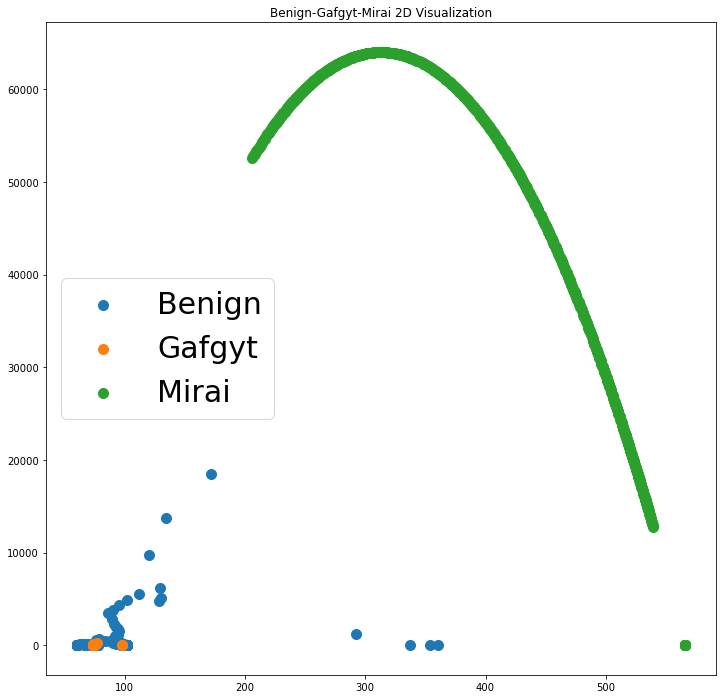

In [16]:
visualization_2d(data_benign[:1000], data_gafgyt[:1000],data_mirai[:1000], indexes=[1,2], s=100, fontsize=30)

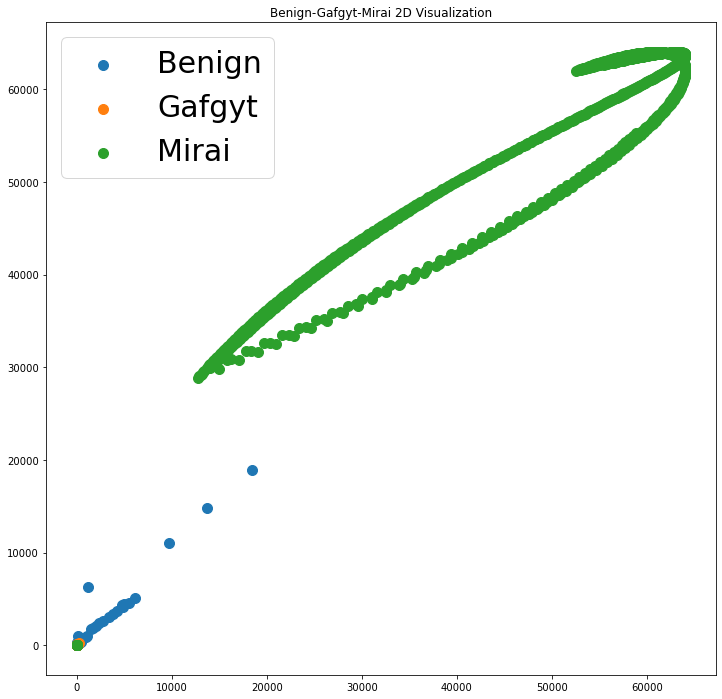

In [17]:
visualization_2d(data_benign[:1000], data_gafgyt[:1000],data_mirai[:1000], indexes=[2,5], s=100, fontsize=30)

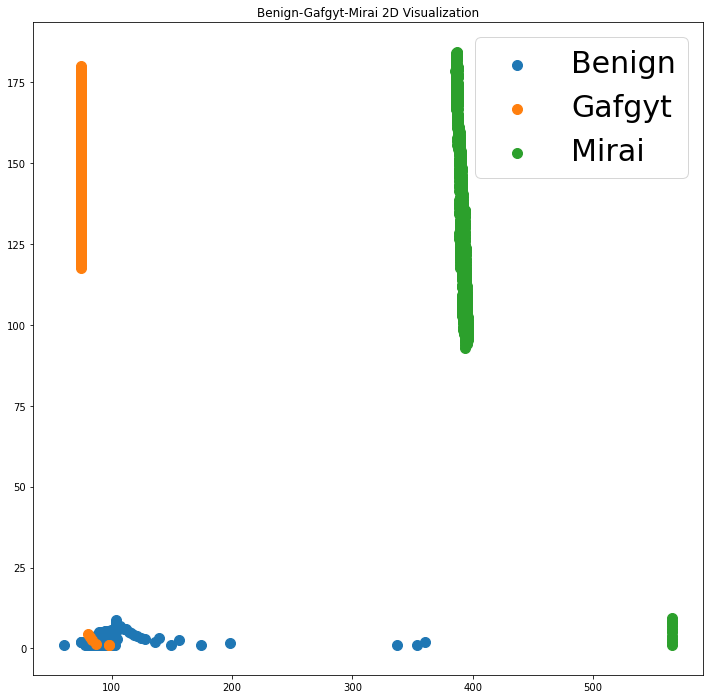

In [18]:
visualization_2d(data_benign[:1000], data_gafgyt[:1000],data_mirai[:1000], indexes=[10,15], s=100, fontsize=30)

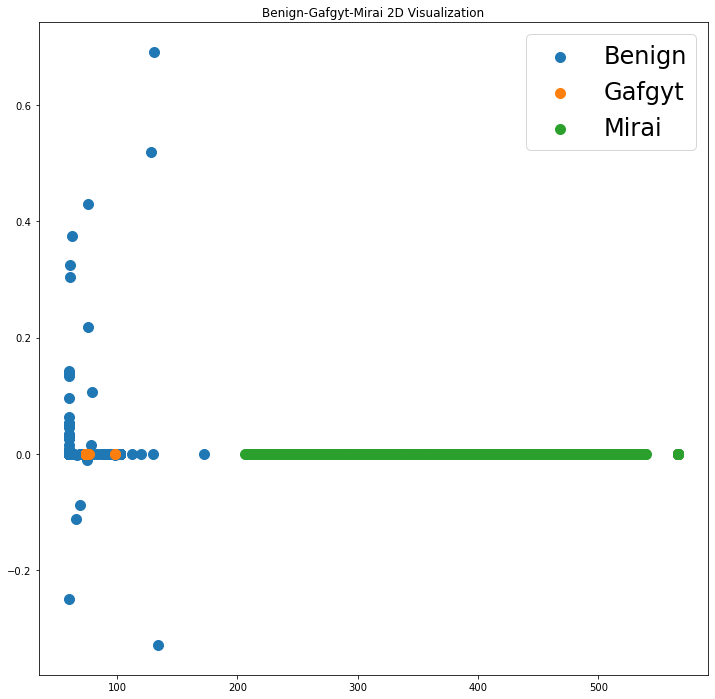

In [19]:
visualization_2d(data_benign[:1000], data_gafgyt[:1000],data_mirai[:1000], indexes=[1,50], s=100, fontsize=24)

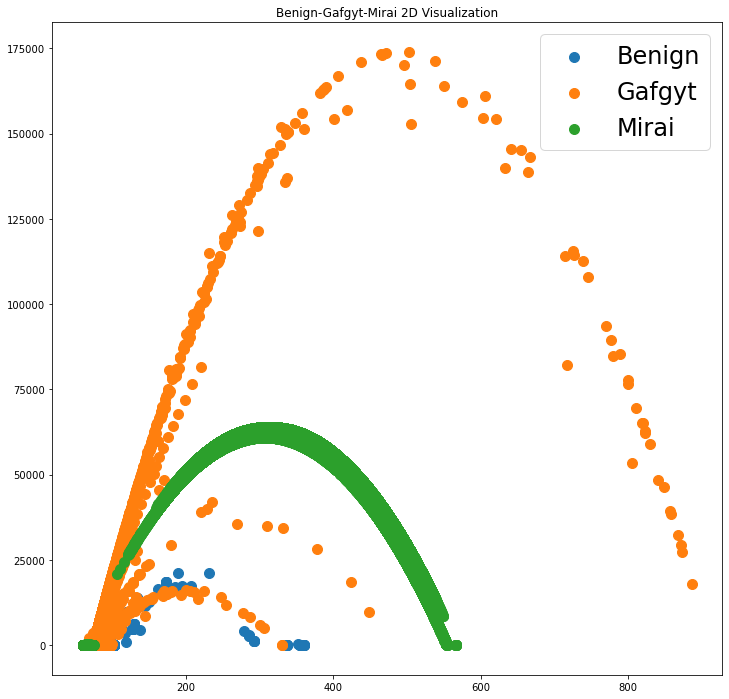

In [20]:
visualization_2d(data_benign, data_gafgyt, data_mirai, indexes=[1,2], s=100, fontsize=24)

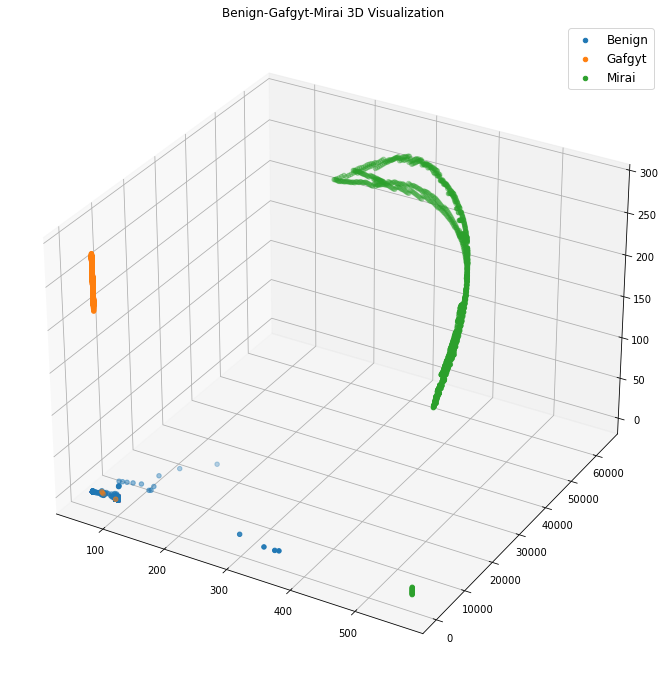

In [21]:
visualization_3d(data_benign[:1000], data_gafgyt[:1000],data_mirai[:1000], indexes=[1,2,3])

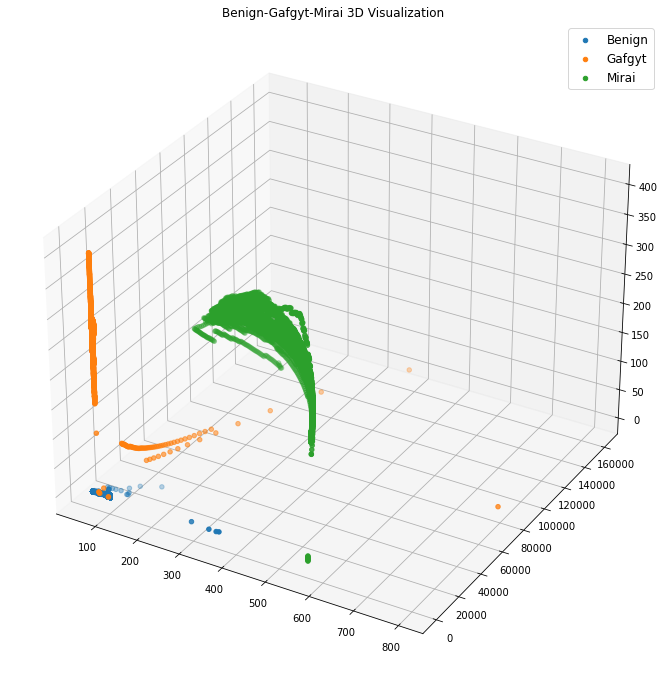

In [22]:
visualization_3d(data_benign[:10000], data_gafgyt[:10000],data_mirai[:10000], indexes=[1,2,3])

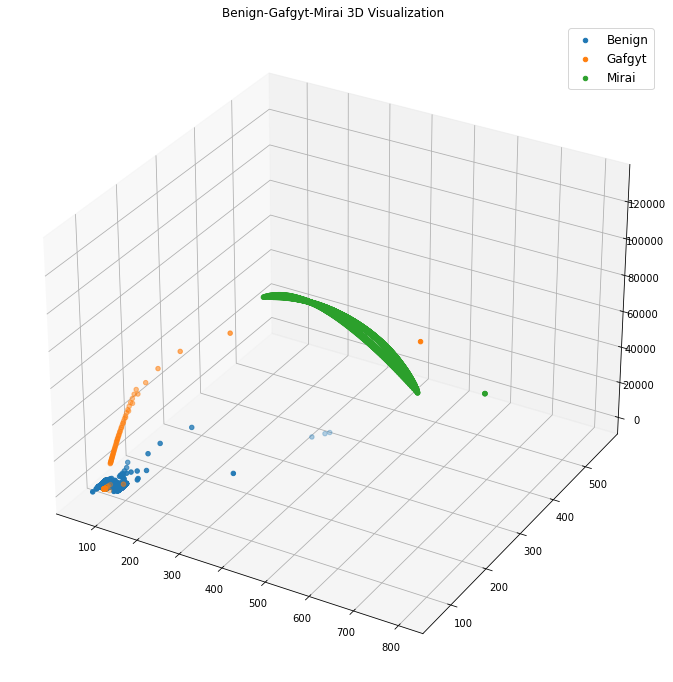

In [23]:
visualization_3d(data_benign[:10000], data_gafgyt[:10000],data_mirai[:10000], indexes=[1,10,20])

## Standardization

In [24]:
# Normalize
data_benign_scaled = scale(data_benign)
data_gafgyt_scaled = scale(data_gafgyt)
data_mirai_scaled = scale(data_mirai)

/home/ladin/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/ladin/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/ladin/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [25]:
# scaller, data_benign_standardized, _ = scale_data(X_train=data_benign)

In [26]:
# data_gafgyt_standardized = scaller.transform(data_gafgyt)

In [27]:
# data_mirai_standardized = scaller.transform(data_mirai)

### Statistics

In [28]:
data_benign.min(), data_benign_scaled.min(), data_benign.max(), data_benign_scaled.max()

(-4077.540567, -55.49110686373327, 5.67e+17, 114.65162222019859)

In [29]:
data_benign.mean(), data_benign_scaled.mean()

(49092248189070.38, 1.137263426616985e-18)

In [30]:
data_gafgyt.min(), data_gafgyt_scaled.min(), data_gafgyt.max(), data_gafgyt_scaled.max()

(-84674.50914359995,
 -502.19078164552263,
 5.669444901972914e+17,
 349.06708224319493)

In [31]:
data_gafgyt.mean(), data_gafgyt_scaled.mean()

(577271680703558.8, -1.0424161795017633e-17)

In [32]:
data_mirai.min(), data_mirai_scaled.min(), data_mirai.max(), data_mirai_scaled.max()

(0.0, -3.6018356491217034, 5.6825918758667366e+17, 571.2744496084645)

In [33]:
data_mirai.mean(), data_mirai_scaled.mean()

(1400348984815.0903, 1.1816683482664733e-17)

In [34]:
np.median(data_gafgyt_scaled), np.median(data_mirai_scaled)

(-0.025712467601541125, -0.001751300092435904)

In [35]:
np.median(data_benign_scaled)

-0.041148782795073044

In [36]:
data_gafgyt_scaled.std(), data_mirai_scaled.std()

(1.0000000000000007, 0.9088932591463865)

In [37]:
data_benign_scaled.std()

1.0

In [38]:
np.median(data_benign), np.median(data_gafgyt), np.median(data_mirai)

(1.071673464, 1.0, 43.24303881240394)

In [39]:
data_benign.std(), data_gafgyt.std(), data_mirai.std()

(4468228022734605.0, 1.6626683942842062e+16, 615749711990491.4)

### Visualization

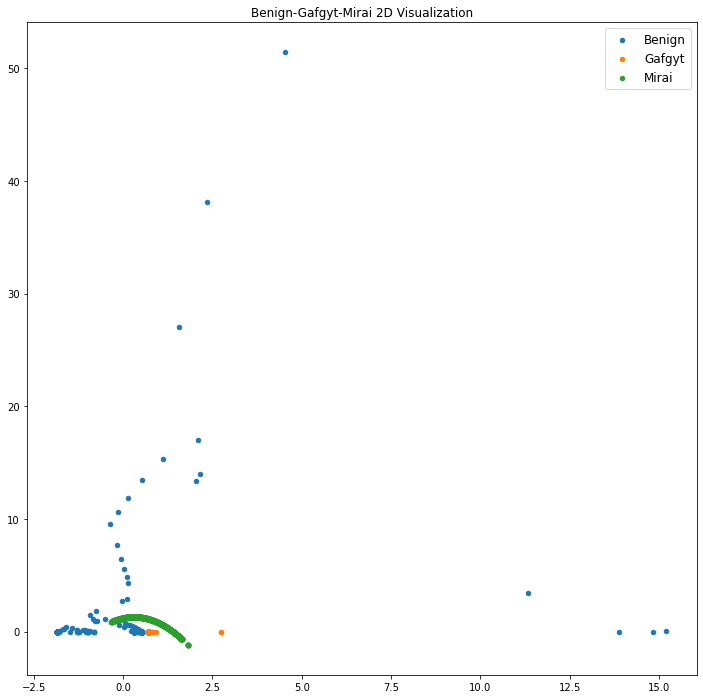

In [40]:
visualization_2d(data_benign_scaled[:1000], data_gafgyt_scaled[:1000],data_mirai_scaled[:1000], indexes=[1,2])

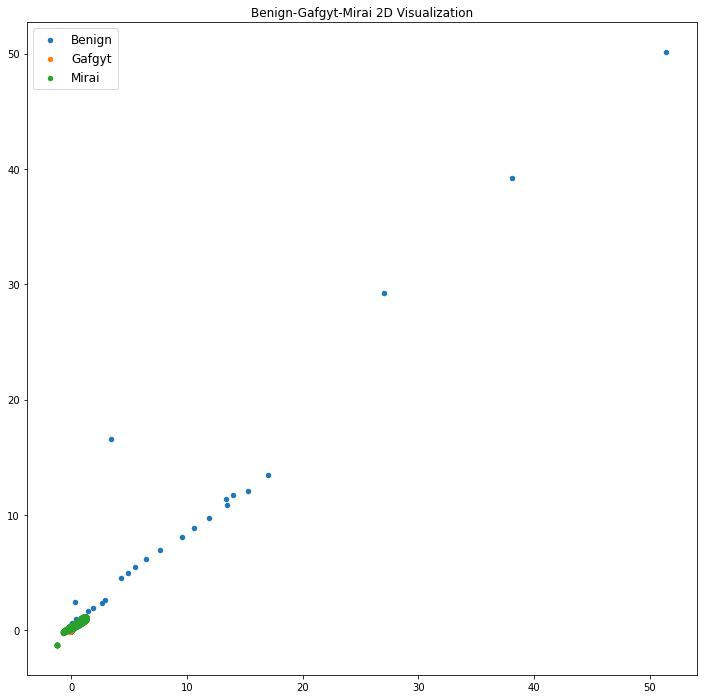

In [41]:
visualization_2d(data_benign_scaled[:1000], data_gafgyt_scaled[:1000],data_mirai_scaled[:1000], indexes=[2,5])

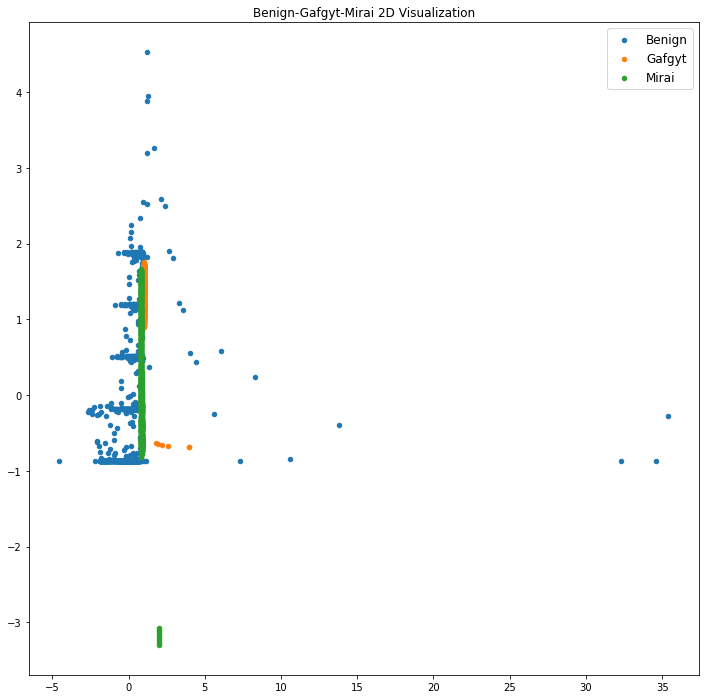

In [42]:
visualization_2d(data_benign_scaled[:1000], data_gafgyt_scaled[:1000],data_mirai_scaled[:1000], indexes=[10,15])

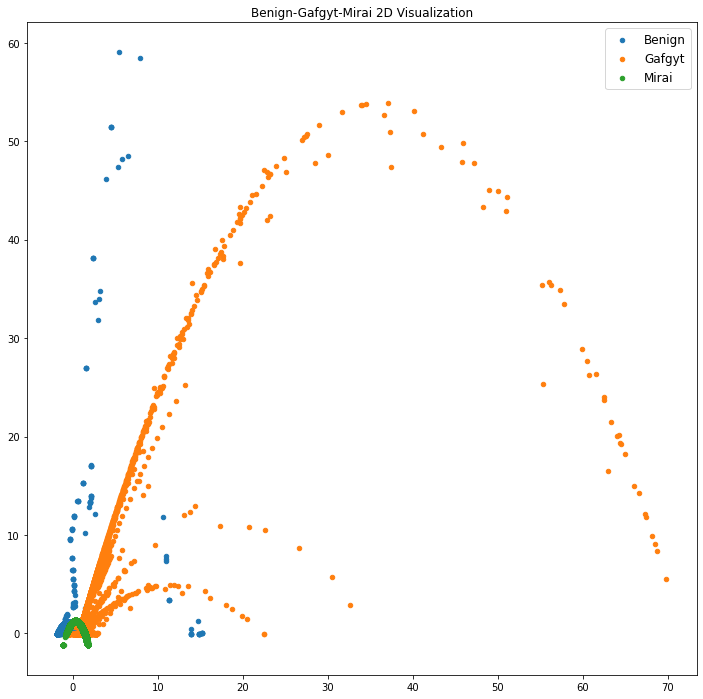

In [43]:
visualization_2d(data_benign_scaled, data_gafgyt_scaled, data_mirai_scaled, indexes=[1,2])

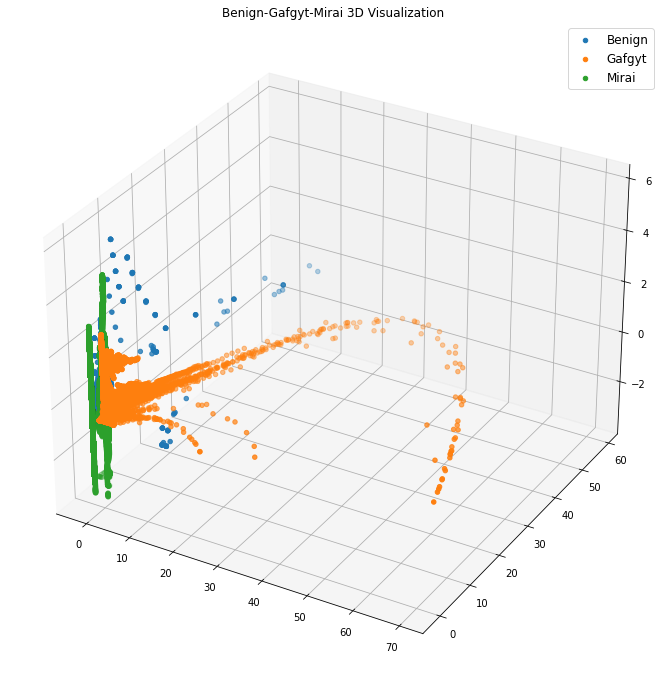

In [44]:
visualization_3d(data_benign_scaled, data_gafgyt_scaled, data_mirai_scaled, indexes=[1,2,3])

# Train AE

### Train on Benign

--------------Training and testing in the same device----------------
(49548, 115) (49548,)
------------Scale data-----------------
(49548, 115) (49548,)
X_train_scaled
[[-1.90873153e-01 -1.20815098e-01 -9.37995580e-04 ... -8.87030492e-04
  -4.86994603e-04 -2.29539692e-03]
 [-1.90873153e-01  9.75905789e-01 -9.37995580e-04 ...  1.15379532e-03
  -4.86994603e-04 -2.29539692e-03]
 [-6.05261661e-02  1.00000000e+00  7.49174792e-04 ...  6.62064588e-03
  -4.86994603e-04 -2.29539692e-03]
 ...
 [-1.86061663e-01  7.46610418e-01  5.76295930e-02 ... -8.87030492e-04
  -4.86994603e-04 -2.29539692e-03]
 [-1.90872726e-01 -1.20812659e-01 -9.30663387e-04 ... -8.87030492e-04
  -4.86994603e-04 -2.29539692e-03]
 [-5.41805436e-02 -8.54671941e-02  2.87302093e-03 ... -8.87030492e-04
  -4.86994603e-04 -2.29539692e-03]]
---------Method `ae` is used for feacture extraction (it can be `ae` or `pca`)-----------
-------------AE process-------------
Epoch 1/50
199/199 [==============================] - 2s 11ms/step -

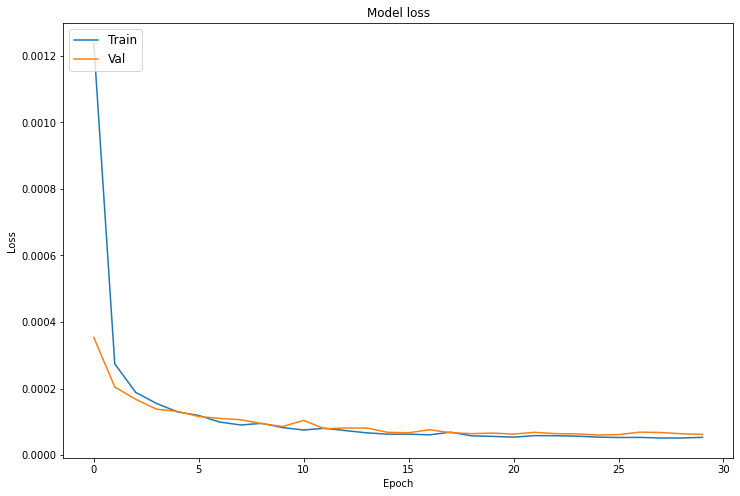

(49548, 29) (49548,)
---------Normalize data--------------
(49548, 29) (49548,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM-------------------------------------
Number of feature:  29
Hyper-parameters optimization process
Best: {'learning_rate': 4.031270675309937, 'sigma': 9.337483689619514, 'x': 47.78065409458446}
---------SOM has been turned!-----------
Starting SOM Weights init
Perform SOM (turned) train random
1.0
Total train time: 129.79083585739136


In [45]:
_, _, _, _, encoder, _ = process_train_partial(X_train=data_benign_scaled, y_train=target_benign, method='ae', num_features=29)

In [46]:
# Transform data
data_benign_encoded = encoder.predict(data_benign_scaled)
data_gafgyt_encoded = encoder.predict(data_gafgyt_scaled)
data_mirai_encoded = encoder.predict(data_mirai_scaled)

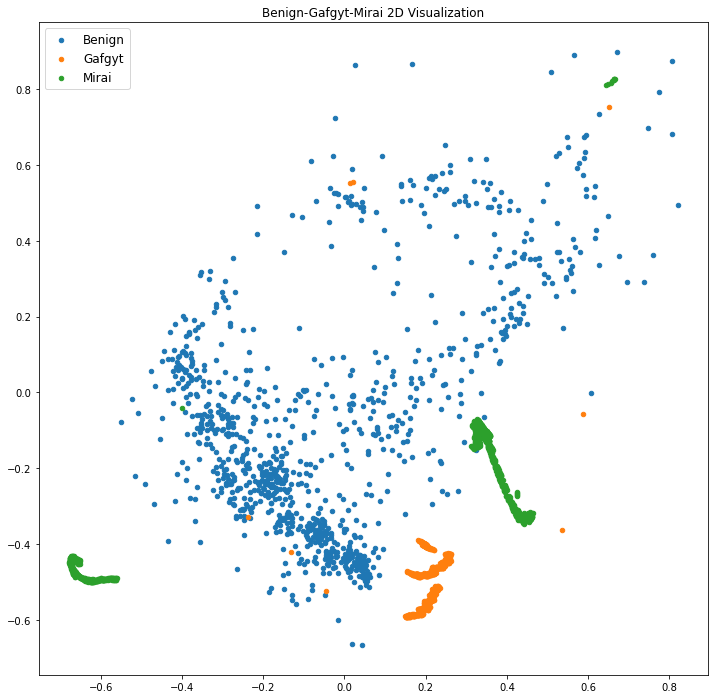

In [47]:
visualization_2d(data_benign_encoded[:1000], data_gafgyt_encoded[:1000],data_mirai_encoded[:1000], indexes=[0,1])

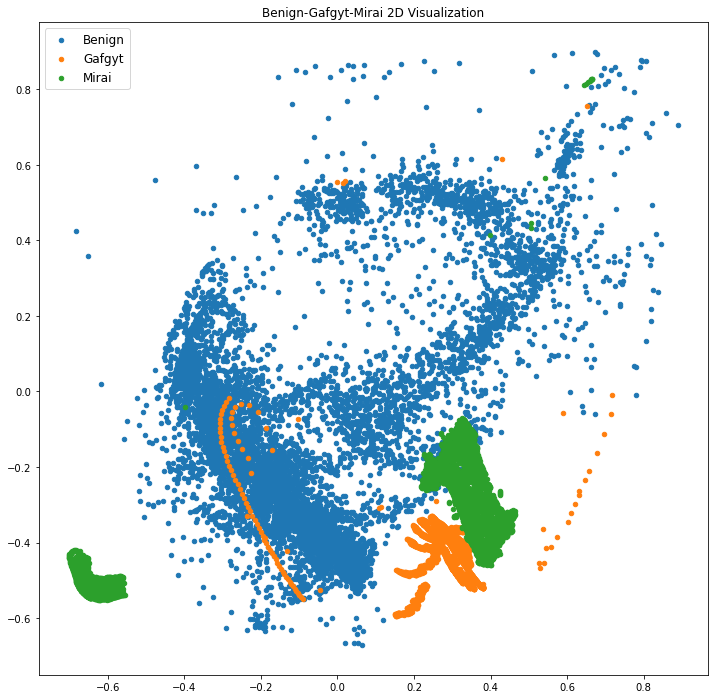

In [48]:
visualization_2d(data_benign_encoded[:10000], data_gafgyt_encoded[:10000],data_mirai_encoded[:10000], indexes=[0,1])

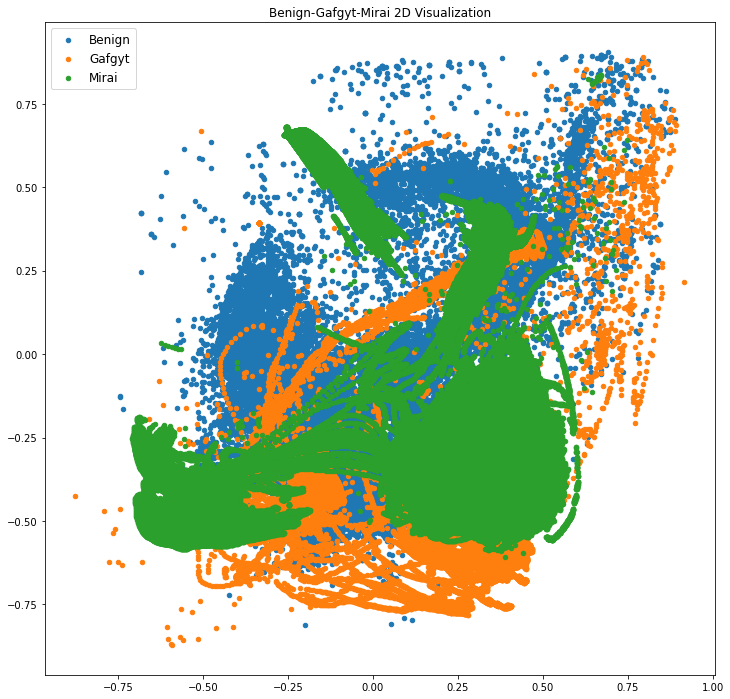

In [49]:
visualization_2d(data_benign_encoded, data_gafgyt_encoded,data_mirai_encoded, indexes=[0,1])

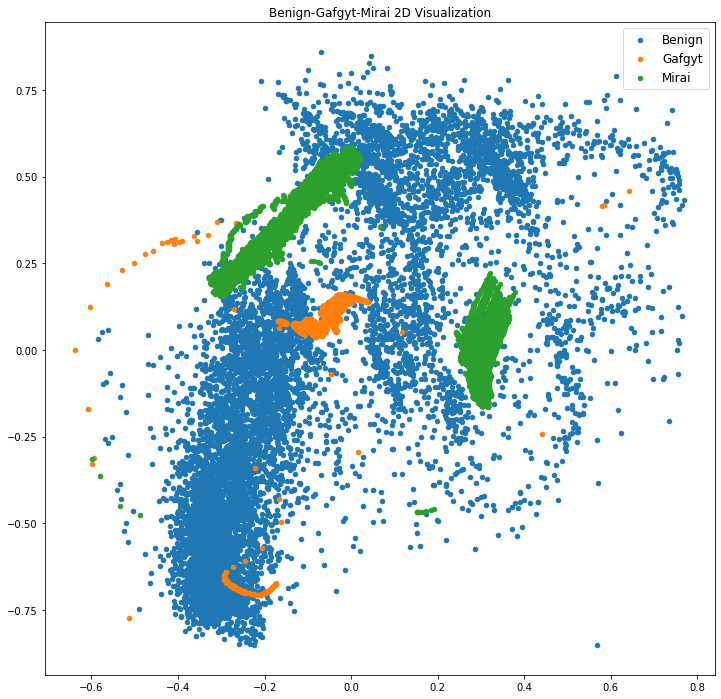

In [50]:
visualization_2d(data_benign_encoded[:10000], data_gafgyt_encoded[:10000],data_mirai_encoded[:10000], indexes=[10,25])

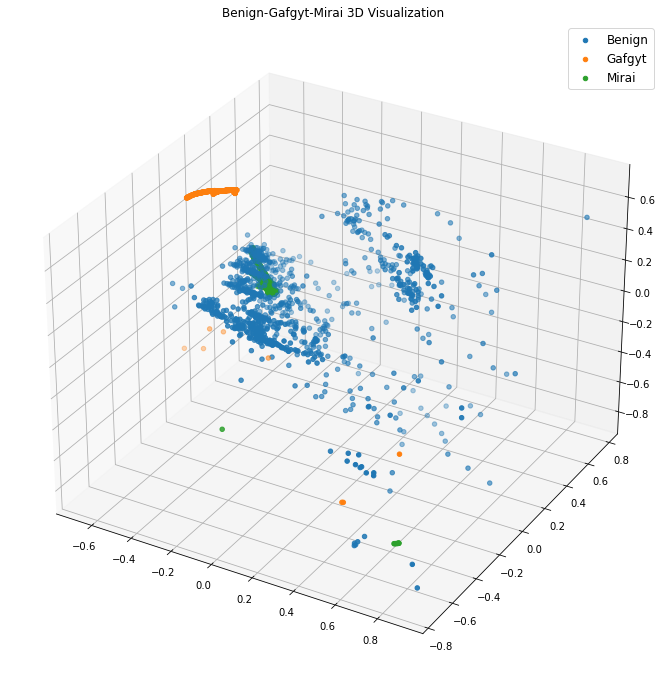

In [51]:
visualization_3d(data_benign_encoded[:1000], data_gafgyt_encoded[:1000],data_mirai_encoded[:1000], indexes=[1,2,3])

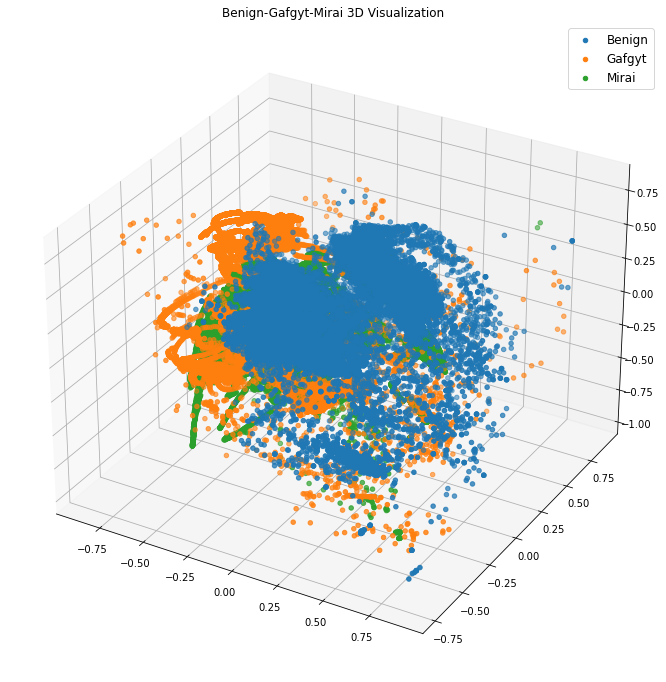

In [52]:
visualization_3d(data_benign_encoded, data_gafgyt_encoded,data_mirai_encoded, indexes=[1,2,3])

In [53]:
_, _, _, _, _, pca = process_train_partial(X_train=data_benign_scaled, y_train=target_benign, method='pca', num_features=29)

--------------Training and testing in the same device----------------
(49548, 115) (49548,)
------------Scale data-----------------
(49548, 115) (49548,)
X_train_scaled
[[-1.90873153e-01 -1.20815098e-01 -9.37995580e-04 ... -8.87030492e-04
  -4.86994603e-04 -2.29539692e-03]
 [-1.90873153e-01  9.75905789e-01 -9.37995580e-04 ...  1.15379532e-03
  -4.86994603e-04 -2.29539692e-03]
 [-6.05261661e-02  1.00000000e+00  7.49174792e-04 ...  6.62064588e-03
  -4.86994603e-04 -2.29539692e-03]
 ...
 [-1.86061663e-01  7.46610418e-01  5.76295930e-02 ... -8.87030492e-04
  -4.86994603e-04 -2.29539692e-03]
 [-1.90872726e-01 -1.20812659e-01 -9.30663387e-04 ... -8.87030492e-04
  -4.86994603e-04 -2.29539692e-03]
 [-5.41805436e-02 -8.54671941e-02  2.87302093e-03 ... -8.87030492e-04
  -4.86994603e-04 -2.29539692e-03]]
---------Method `pca` is used for feacture extraction (it can be `ae` or `pca`)-----------
PCA process
(49548, 29) (49548,)
---------Normalize data--------------
(49548, 29) (49548,)
------------

In [54]:
data_benign_transformed = pca.transform(data_benign_scaled)
data_gafgyt_transformed = pca.transform(data_gafgyt_scaled)
data_mirai_transformed = pca.transform(data_mirai_scaled)

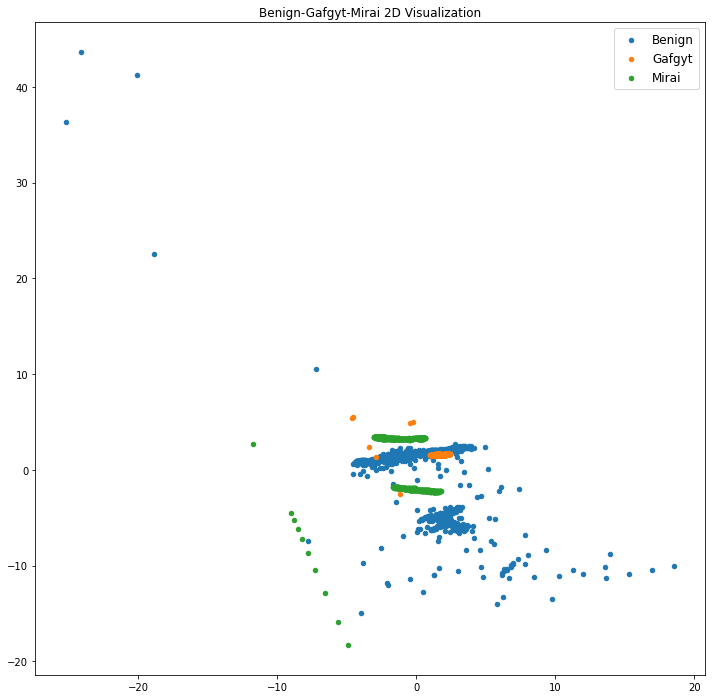

In [55]:
visualization_2d(data_benign_transformed[:1000], data_gafgyt_transformed[:1000],data_mirai_transformed[:1000], indexes=[1,2])

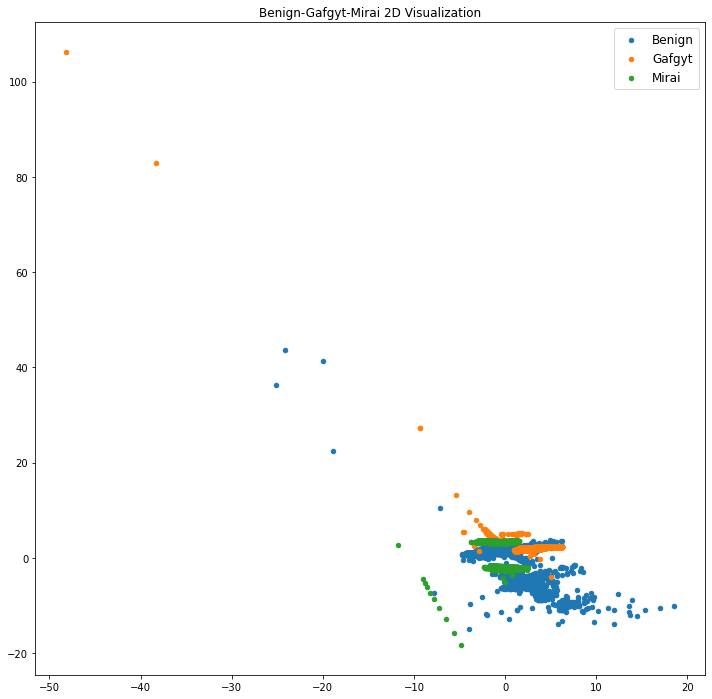

In [56]:
visualization_2d(data_benign_transformed[:10000], data_gafgyt_transformed[:10000],data_mirai_transformed[:10000], indexes=[1,2])

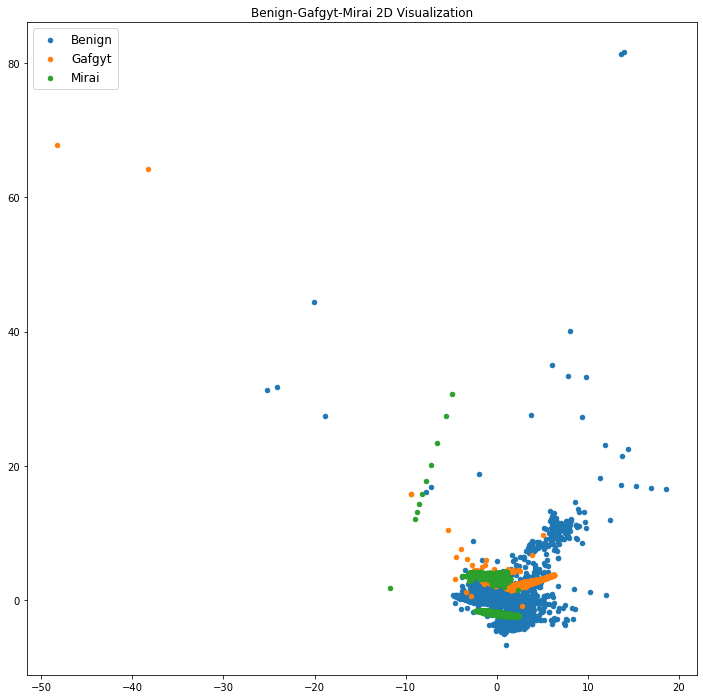

In [57]:
visualization_2d(data_benign_transformed[:10000], data_gafgyt_transformed[:10000],data_mirai_transformed[:10000], indexes=[1,3])

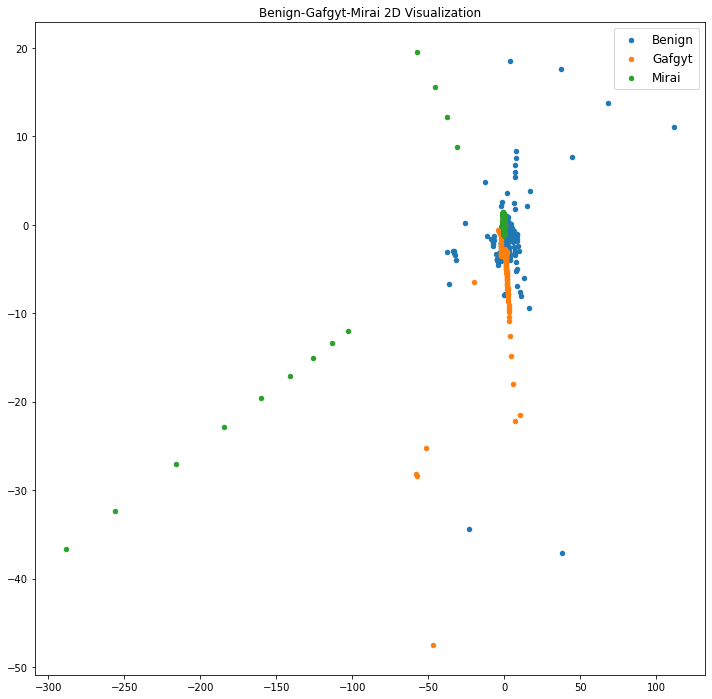

In [58]:
visualization_2d(data_benign_transformed[:10000], data_gafgyt_transformed[:10000],data_mirai_transformed[:10000], indexes=[10,25])

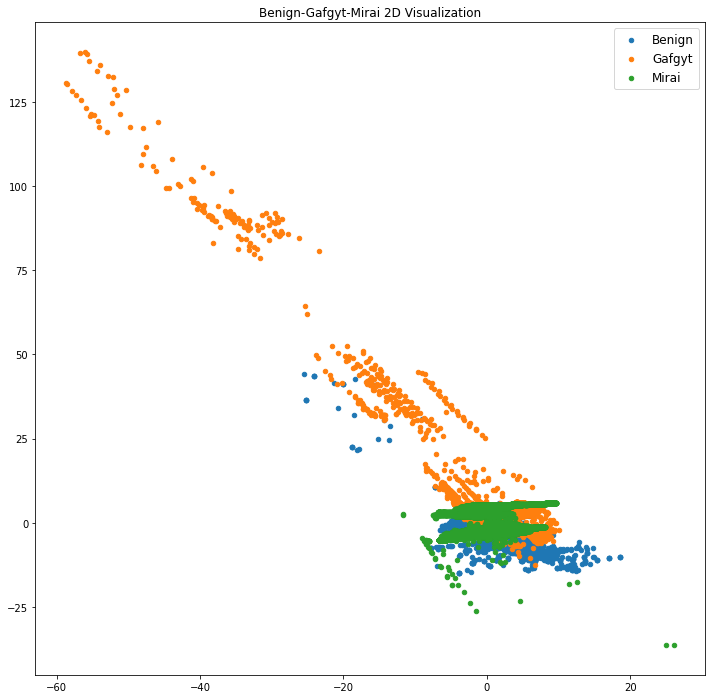

In [59]:
visualization_2d(data_benign_transformed, data_gafgyt_transformed,data_mirai_transformed, indexes=[1,2])

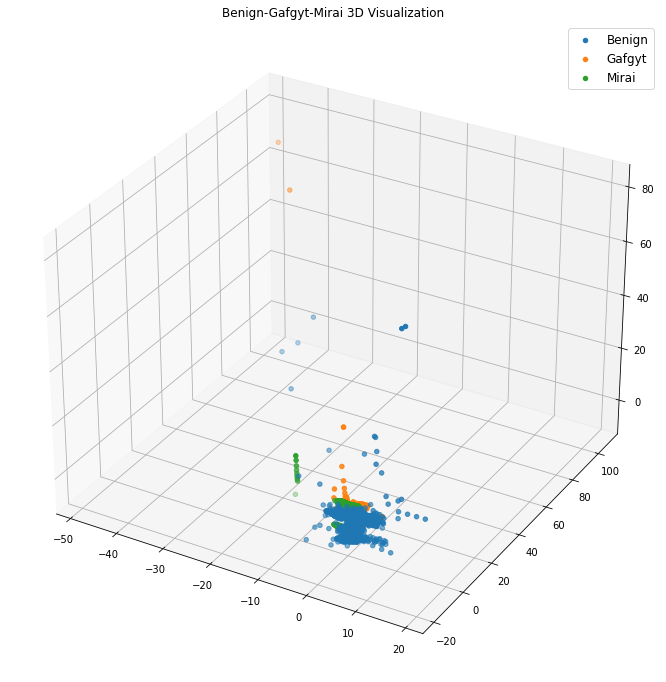

In [60]:
visualization_3d(data_benign_transformed[:10000], data_gafgyt_transformed[:10000],data_mirai_transformed[:10000], indexes=[1,2,3])

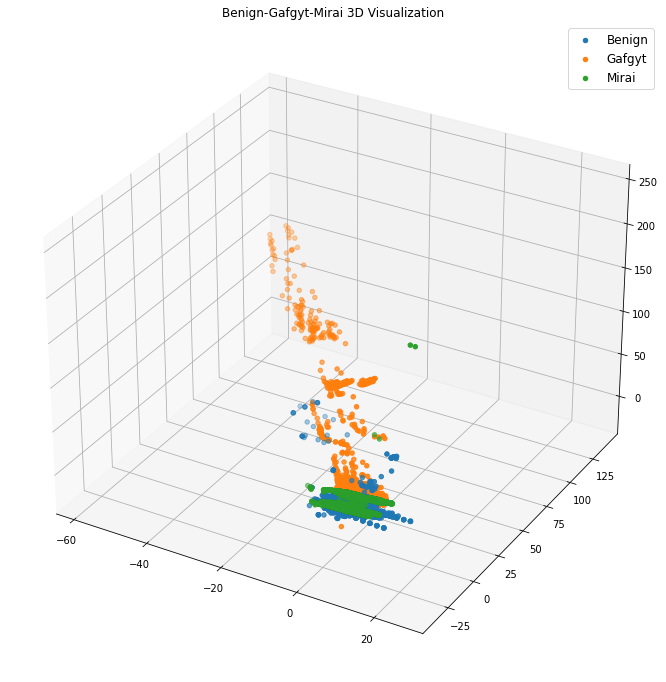

In [61]:
visualization_3d(data_benign_transformed, data_gafgyt_transformed,data_mirai_transformed, indexes=[1,2,3])